# EDA

# Table of contents
* [Overview](#Overview)
* [1. Imports](#1.-Imports)
* [2. Data Load](#2.-Data-Load)
* [3. Explore Data](#3.-Explore-Data)
* [4. Data Visualization](#4.-Data-Visualization)
* [5. Inferential Statistics](#5.-Inferential-Statistics)
* [Conclusion](#Conclusion)

## Overview

I am going to explore dataset to see some patterns or insights by data visualization and inferential statistics.   

Relevant website:
https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113

## 1. Imports

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import t
import pandas as pd
from scipy.stats import ttest_ind
import pingouin as pg
import folium
from folium import plugins

## 2. Data Load

In [37]:
# data load
data = pd.read_pickle('/Users/hansangjun/Desktop/Springboard/Capstone2/data/telco_data/AfterWrangling.pkl')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   object 
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

## 3. Explore Data

### Churn Label Ratio

No     5174
Yes    1869
Name: Churn Label, dtype: int64


Text(0.5, 1.0, 'Count Churn')

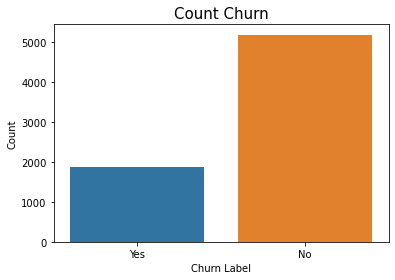

In [12]:
# Column 'Churn Label' will be our dependent variable.
print(data['Churn Label'].value_counts())
p = sns.countplot(x="Churn Label",
                data=data)

p.set_xlabel("Churn Label", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)
p.set_title("Count Churn", fontsize = 15)

In [6]:
# percentage of yes and no
len_no = len(data[data['Churn Label'] == "No"])
len_yes = len(data[data['Churn Label'] == "Yes"])

percentage_no = (len_no / (len_no + len_yes)) * 100
percentage_yes = 100 - percentage_no

print (f"Percentage of the customer remained with the company is {percentage_no}.")
print (f"Percentage of the customer left the company this quarter is {percentage_yes}.")

Percentage of the customer remained with the company is 73.4630129206304.
Percentage of the customer left the company this quarter is 26.536987079369595.


The above result tells that dependent variable is imbalanced. I am going to address imbalance in the preprocessing part.

In [7]:
# Mean group by 'Churn Label'
data.groupby('Churn Label').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
Churn Label,,,,,
No,37.569965,61.265124,2549.911442,50.098183,4490.921337
Yes,17.979133,74.441332,1531.796094,82.510433,4149.414660


### Difference of Each Continuos Value

[(0.0, 4541.2111672190595)]

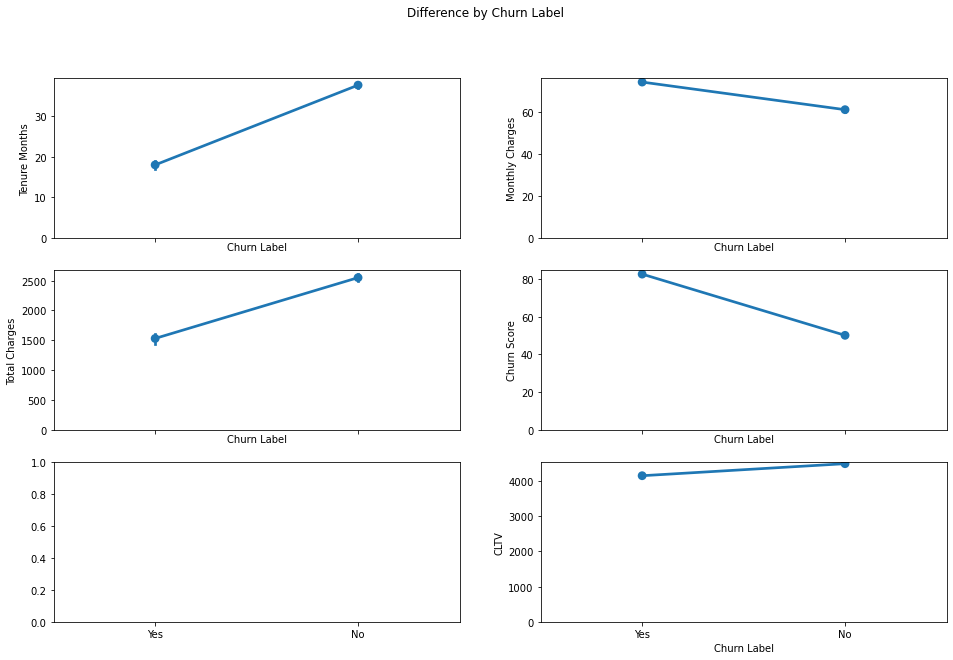

In [25]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,10))
fig.suptitle('Difference by Churn Label')

sns.pointplot(ax=axes[0, 0], x='Churn Label',y='Tenure Months',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[0, 1], x='Churn Label',y='Monthly Charges',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[1, 0], x='Churn Label',y='Total Charges',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[1, 1], x='Churn Label',y='Churn Score',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[2, 1], x='Churn Label',y='CLTV',data=data).set(ylim=(0, None))

Above slope graphs tell that churned customer relatively has fewer tenure months, lower total charges, and higher churn score compared to not churned customer.

### Heatmap: Churned Observation

Heatmap will tell which area has high churn rate. Also, I am going to run the heatmap by Churn Reason. This might help company eliminating painpoint.

In [39]:
data_yes = data[data['Churn Label'] == "Yes"]
station = data_yes[['Latitude', 'Longitude']]

In [40]:
mapYes = folium.Map(location=[37.255637, -120.493537], zoom_start=6)

In [41]:
stationArr = station.values
mapYes.add_child(plugins.HeatMap(stationArr, radius=15))
mapYes


In [7]:
data['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

Let's check the top 5 churn reason.

### Heatmap - Churn Reason#1: Attitude of support person

In [42]:
data_yes = data[data['Churn Label'] == "Yes"]

yes_reason1 = data_yes[data_yes['Churn Reason'] == "Attitude of support person"]
station = yes_reason1[['Latitude', 'Longitude']]

In [44]:
map1 = folium.Map(location=[37.255637, -120.493537], zoom_start=6)
stationArr = station.values
map1.add_child(plugins.HeatMap(stationArr, radius=15))
map1

Los Angeles County has to improve the customer service.

### Heatmap - Churn Reason#2: Competitor offered higher download speeds

In [45]:
data_yes = data[data['Churn Label'] == "Yes"]

yes_reason2 = data_yes[data_yes['Churn Reason'] == "Competitor offered higher download speeds"]
station = yes_reason2[['Latitude', 'Longitude']]

In [46]:
map2 = folium.Map(location=[37.255637, -120.493537], zoom_start=6)
stationArr = station.values
map2.add_child(plugins.HeatMap(stationArr, radius=15))
map2

LA and SF areas need better download speed.

### Heatmap - Churn Reason#3: Competitor offered more data

In [47]:
data_yes = data[data['Churn Label'] == "Yes"]

yes_reason3 = data_yes[data_yes['Churn Reason'] == "Competitor offered more data"]
station = yes_reason3[['Latitude', 'Longitude']]

In [48]:
map3 = folium.Map(location=[37.255637, -120.493537], zoom_start=6)
stationArr = station.values
map3.add_child(plugins.HeatMap(stationArr, radius=15))
map3

LA and Sacramento areas has to offer more data.

### Heatmap - Churn Reason#4: Competitor made better offer

In [49]:
data_yes = data[data['Churn Label'] == "Yes"]

yes_reason4 = data_yes[data_yes['Churn Reason'] == "Competitor made better offer"]
station = yes_reason4[['Latitude', 'Longitude']]

In [50]:
map4 = folium.Map(location=[37.255637, -120.493537], zoom_start=6)
stationArr = station.values
map4.add_child(plugins.HeatMap(stationArr, radius=15))
map4

LA area has to suggest better deal.

### Heatmap - Churn Reason#5: Attitude of service provider

In [51]:
data_yes = data[data['Churn Label'] == "Yes"]

yes_reason5 = data_yes[data_yes['Churn Reason'] == "Attitude of service provider"]
station = yes_reason5[['Latitude', 'Longitude']]

In [52]:
map5 = folium.Map(location=[37.255637, -120.493537], zoom_start=6)
stationArr = station.values
map5.add_child(plugins.HeatMap(stationArr, radius=15))
map5

LA and San Diego areas has to improve customer service.

Heatmap tells that LA area has to improve customer service, as well as offer better deal.

## 4. Data Visualization 

I am going to visualize all the object variable with Churn Label.

In [23]:
data.select_dtypes('object').columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Label', 'Churn Reason'],
      dtype='object')

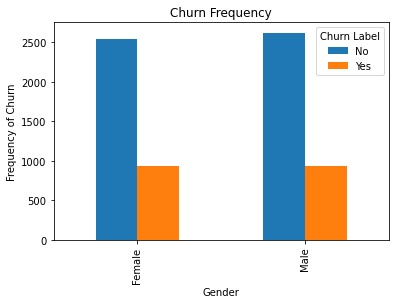

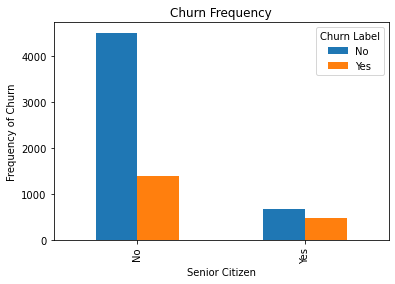

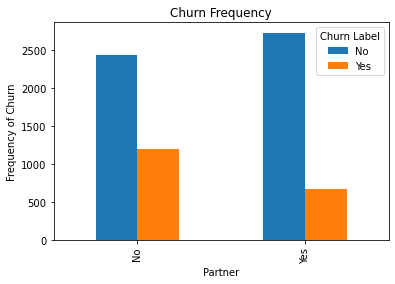

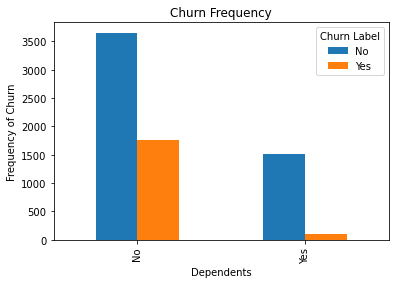

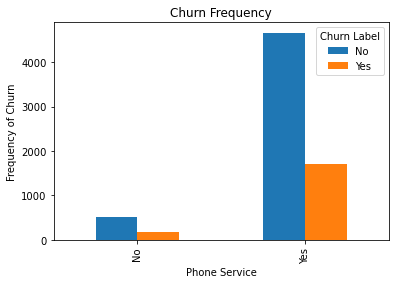

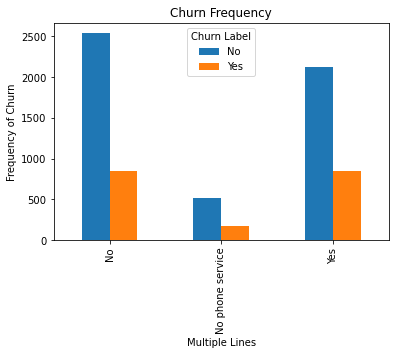

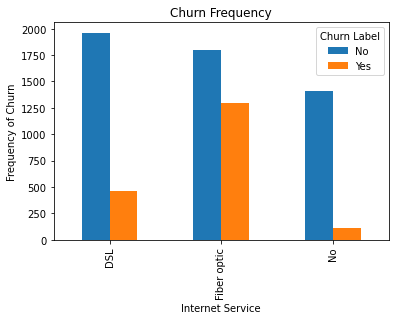

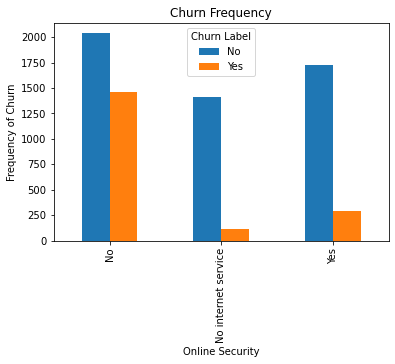

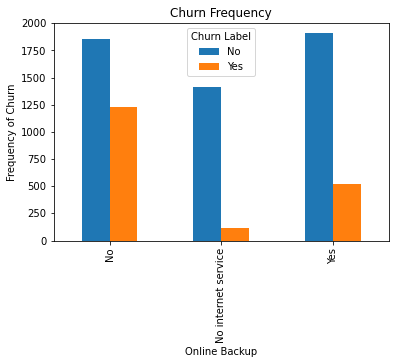

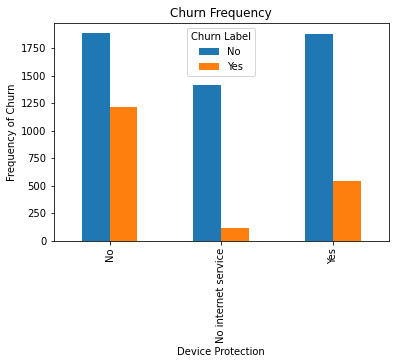

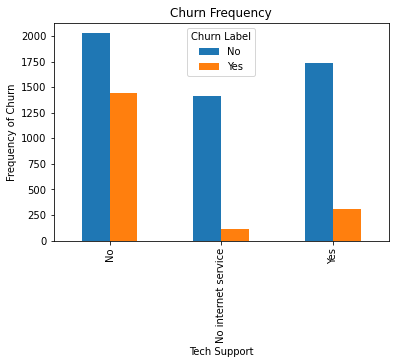

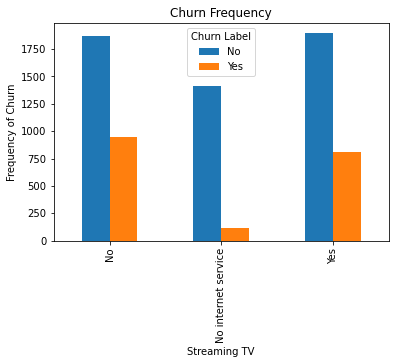

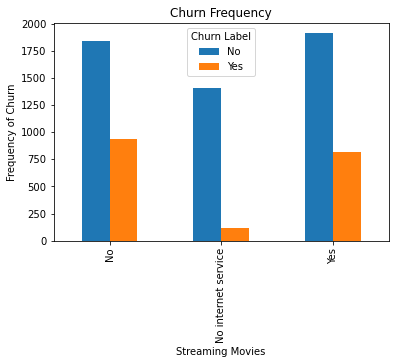

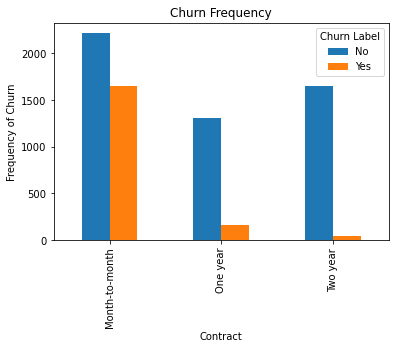

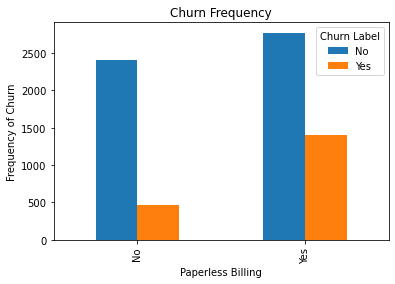

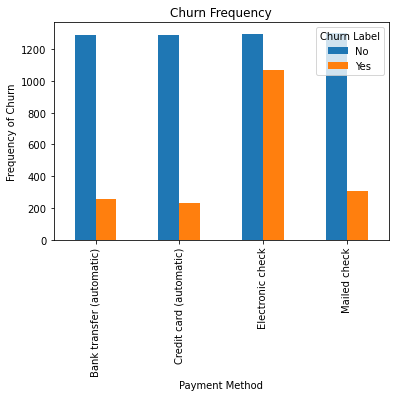

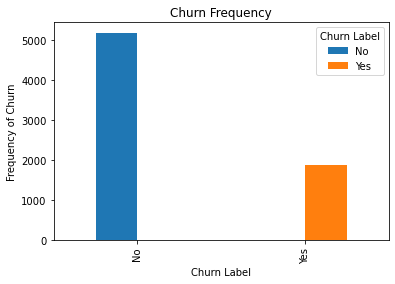

In [27]:
for i in range(len(data.select_dtypes('object').columns)):
    if i == len(data.select_dtypes('object').columns) - 1:
        break
    # city and zip code have too many values. So, we are taking out.
    elif data.select_dtypes('object').columns[i] == 'City':
        continue
    elif data.select_dtypes('object').columns[i] == 'Zip Code':
        continue
        
    else:
        pd.crosstab(data[data.select_dtypes('object').columns[i]], data['Churn Label']).plot(kind='bar')
        plt.title('Churn Frequency')
        plt.xlabel(data.select_dtypes('object').columns[i])
        plt.ylabel('Frequency of Churn')


A customer who has Month-to-Month contract, pays with electronic check, is senior citizen, declines to have tech support, device protection, online backup and online security, or uses fiber optic internet service tends to be a churned customer.

## 5. Inferential Statistics

T-test (continuous and discrete variables) and Chi-square (two discrete variables) will present relationship between two variables. This step would give more reliability regarding what I initially found. 

### T-test #1

I am going to run t-test to figure out relationship between two variables: 'Monthly Charges' and 'Churn Label'
1. Null hypothesis: monthly charges with churn customer >= monthly charges with no churn customer

2. Alternative hypothesis: monthly charges with churn customer < monthly charges with no churn customer

In [5]:
x0 = data['Monthly Charges'][data['Churn Label'] == "Yes"]
x1 = data['Monthly Charges'][data['Churn Label'] == "No"]
n0 = len(x0)
n1 = len(x1)
n0, n1

(1869, 5174)

In [6]:
xbar0 = np.mean(x0)
xbar1 = np.mean(x1)
s0 = np.std(x0, ddof=1)
s1 = np.std(x1, ddof=1)
sp = np.sqrt( ((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / ( n0 + n1 - 2) )
t_stat = ( xbar0 - xbar1 ) / ( sp * np.sqrt( 1/n0 + 1/n1 ) )

total_dof = n0 + n1 - 2
p_value = 2 * t.cdf(t_stat, df=total_dof)
print(f"t-statistic is {t_stat}.")
print(f"p_value is {p_value}.")
print("Since p-value is greater than 0.05, we accept the null hypothesis. We can say null hypothesis is true.")

t-statistic is 16.536738015936432.
p_value is 2.0.
Since p-value is greater than 0.05, we accept the null hypothesis. We can say null hypothesis is true.


### T-test #2

I am going to run t-test to figure out relationship between two variables: 'Tenure Months' and 'Churn Label'
1. Null hypothesis: Tenure Months with churn customer >= Tenure Months with no churn customer
2. Alternative hypothesis: Tenure Months with churn customer < Tenure Months with no churn customer

In [36]:
x0 = data['Tenure Months'][data['Churn Label'] == "Yes"]
x1 = data['Tenure Months'][data['Churn Label'] == "No"]
n0 = len(x0)
n1 = len(x1)
n0, n1

(1869, 5174)

In [38]:
xbar0 = np.mean(x0)
xbar1 = np.mean(x1)
s0 = np.std(x0, ddof=1)
s1 = np.std(x1, ddof=1)
sp = np.sqrt( ((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / ( n0 + n1 - 2) )
t_stat = ( xbar0 - xbar1 ) / ( sp * np.sqrt( 1/n0 + 1/n1 ) )

total_dof = n0 + n1 - 2
p_value = 2 * t.cdf(t_stat, df=total_dof)
print(f"t-statistic is {t_stat}.")
print(f"p_value is {p_value}.")
print("Since p-value is less than 0.05, we reject the null hypothesis. We can say null hypothesis is false.")

t-statistic is -31.579550511353805.
p_value is 7.99905796058294e-205.
Since p-value is less than 0.05, we reject the null hypothesis. We can say null hypothesis is false.


### Chi-Square - case #1 (Churn Label and Gender)

Null Hypothesis: There is no relation between two variables: Churn Label and Phone Service.

In [31]:
# Define contigency
contigency= pd.crosstab(data['Churn Label'], data['Gender'])
contigency_pct = pd.crosstab(data['Churn Label'], data['Gender'], normalize='index')
print(contigency)
print(contigency_pct)

Gender       Female  Male
Churn Label              
No             2549  2625
Yes             939   930
Gender         Female      Male
Churn Label                    
No           0.492656  0.507344
Yes          0.502408  0.497592


<AxesSubplot:xlabel='Gender', ylabel='Churn Label'>

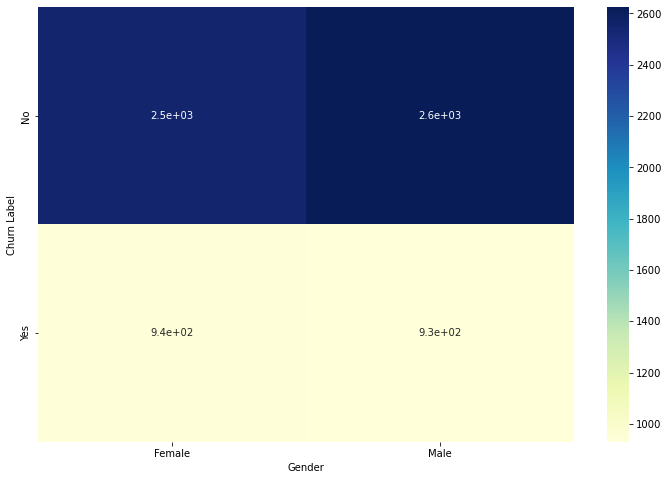

In [32]:
# Heatmap of coningency
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [35]:
c, p, dof, expected = chi2_contingency(contigency)
f"P-value is {p}. Therefore, we accept the null hypothesis. Two variables are independent."

'P-value is 0.48657873605618596. Therefore, we accept the null hypothesis. Two variables are independent.'

It turns out 'Gender' is not a good predictor.

### Chi-Square - case #2 (Churn Label and Contract)

Null Hypothesis: There is no relation between two variables: Churn Label and Senior Citizen.

In [22]:
# Define contigency
contigency= pd.crosstab(data['Churn Label'], data['Contract'])
contigency_pct = pd.crosstab(data['Churn Label'], data['Contract'], normalize='index')
c, p, dof, expected = chi2_contingency(contigency)

print(contigency)
print(contigency_pct)
f"P-value is {p} which is less than 0.05. Therefore, we reject the null hypothesis. Two variables are related."

Contract     Month-to-month  One year  Two year
Churn Label                                    
No                     2220      1307      1647
Yes                    1655       166        48
Contract     Month-to-month  One year  Two year
Churn Label                                    
No                 0.429068  0.252609  0.318322
Yes                0.885500  0.088818  0.025682


'P-value is 5.863038300673391e-258 which is less than 0.05. Therefore, we reject the null hypothesis. Two variables are related.'

It turns out that Contract could be a good predictor.

## Conclusion

1. Slope graphs tell that churned customer relatively has fewer tenure months, lower total charges, and higher churn score compared to not churned customer. 
2. Heatmap tells that LA area has to improve customer service and offer better deals. 
3. Crosstab plot explains behavior of churned customer. (has Month-to-Month contract, pays with electronic check, is senior citizen, declines to have tech support, device protection, online backup and online security, or uses fiber optic internet service)
4. T-test verifies that churned customer has fewer tenure months. Chi-square shows there is no relationship between churn label and gender. This is same result what we expect from Data Visualization step.